Hypothesis: Students who took MATH 232 are driving down the average reported difficulty of the course.

Step one: read the csv file and convert it into a column-oriented data table.

In [38]:
%reload_ext autoreload
%autoreload 2

from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Step two: find those students who received credit for MATH 232 and create 2 lists: one with those who received credit for MATH 232, and one with those who did not.

In [39]:
list_received: list[dict[str, str]] = []
list_not: list[dict[str, str]] = []

for item in data_rows:
    if "MATH 232" in item["prereqs"]:
        list_received.append(item)
    else:
        list_not.append(item)

Step three: make two lists with the difficulty reported by the students, one with those who received credit for MATH 232, and one with those who did not.

In [40]:
difficulty_r: list[int] = []
difficulty_n: list[int] = []

for item in list_received:
    difficulty_r.append(item["difficulty"])

for item in list_not:
    difficulty_n.append(item["difficulty"])

Step four: calculate the mean difficulty of the students who already received the MATH 232 credit and of the students who did not receive it yet.

In [41]:
from data_utils import mean_finder

mean_r: float = mean_finder(difficulty_r)

print(f"Those students who received credit for MATH 232 before taking COMP 110 reported an average of {mean_r} points of difficulty out of 7.")

mean_n: float = mean_finder(difficulty_n)

print(f"Those students who received credit for MATH 232 before taking COMP 110 reported an average of {mean_n} points of difficulty out of 7.")

Those students who received credit for MATH 232 before taking COMP 110 reported an average of 4.44672131147541 points of difficulty out of 7.
Those students who received credit for MATH 232 before taking COMP 110 reported an average of 5.155015197568389 points of difficulty out of 7.


Step five: select just the difficulty column. It will print the first 10 rows.

In [42]:
from data_utils import head, select

difficulty_column: dict[str, list[str]] = select(columns, ["difficulty"])

head(difficulty_column, 10)

{'difficulty': ['5', '3', '5', '6', '4', '5', '6', '5', '5', '7']}

Step six: count the total number of students who did the survey. From those also count the number of students who did and did not receive credit for math 232.

In [43]:
from data_utils import count

counter_a = count(difficulty_column['difficulty'])

students: int = counter_a["1"] + counter_a["2"] + counter_a["3"] + counter_a["4"] + counter_a["5"] + counter_a["6"] + counter_a["7"]

print(f"A total of {students} students did the survey.")
print(f"A total of {len(difficulty_r)} students had already received credit for MATH 232.")
print(f"A total of {len(difficulty_n)} students had not received credit for MATH 232.")

A total of 573 students did the survey.
A total of 244 students had already received credit for MATH 232.
A total of 329 students had not received credit for MATH 232.


Conclusion: Out of the 573 students who did the survey, 244 had already received credit for MATH 232. These students reported an average difficulty of about 4.4 out of 7, while those who had not received credit for MATH 232 reported an average difficulty of about 5.2 out of 7. Therefore, students who already received credit for MATH 232 are driving the average reported difficulty down.

Visual 1: Average difficulty points.

<AxesSubplot:>

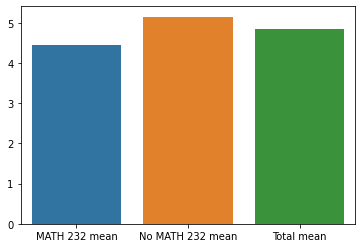

In [44]:
import seaborn

mean_total: float = (mean_r * 244 + mean_n * 329) / 573

seaborn.barplot(x=["MATH 232 mean", "No MATH 232 mean", "Total mean"], y=[mean_r, mean_n, mean_total])

Visual 2: number of students.

<AxesSubplot:>

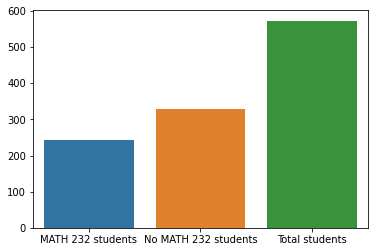

In [45]:
seaborn.barplot(x=["MATH 232 students", "No MATH 232 students", "Total students"], y=[244, 329, 573])